In [ ]:
'''
Тестовое задание Ozon

Задание 1
Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными. 
DataFrame должен состоять из 10000 строк и 5 колонок. 
Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:

1-я колонка – user_id – идентификатор пользователя. 
Длина user_id должна равняться 15-ти символам. 
Идентификатор состоит из случайной комбинации следующих символов: "1234567890abcdefghijk". 
Для каждой строки в DataFrame значение user_id формируются случайным образом.

2-я колонка – order_number – номер заказа. 
Столбец необходимо заполнить случайными значениями в диапазоне от 1 до 10.

3-я колонка – click2delivery – время, прошедшее с момента оформления заказа до вручения клиенту. С
толбец необходимо заполнить случайными значениями из нормального распределения со средним 1440 и стандартным отклонением 200.

4-я колонка – order_items_sum – общая стоимость заказа. 
Значения для этого столбца необходимо взять из экспоненциального распределения с параметром λ = 1, смещённого на +1.

5-я колонка – retention – день жизни покупателя, в который он совершил заказ. 
Необходимо сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15 и 0.05 соответственно.

В случае, если в колонке user_id встречаются дублирующиеся значения, оставь только первое из них.
'''

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns

# Задаем seed для random
np.random.seed(42)
random.seed(42)

# Убираем вывод лишней информации по графикам
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Функция создания пользователя. Первый вариант

def generate_user_id(n=15):
  return ''.join([random.choice('1234567890abcdefghijk') for _ in range(n)])

In [3]:
# Функция создания пользователя. Второй вариант

def generate_user_id2(n=15):
  s = ''
  for i in range(n):
    s = s + random.choice('1234567890abcdefghijk')
  return s

In [4]:
# Проверка

generate_user_id()

'k4198854h3id213'

In [5]:
# Проверка 02
generate_user_id2()

'78gj1h7khd8ei91'

In [6]:
# Проверка 03

[random.choice('1234567890abcdefghijk') for _ in range(15)]

['6', 'd', 'a', '9', '5', '7', 'a', '4', '3', 'c', '4', 'b', 'b', 'j', '9']

In [ ]:
'''
Работает
'''

In [7]:
# Количество пунктов датафрейма, постоянное и вспомогательное

N = 10_000
n = 10_000

# Функция создания датафрейма. Генерируем столбцы user_id, order_num, 'click2delivery', 'order_items_sum' и etention
# В необходимых местах используем нормальное и экспотенциальное распределение.

def generate_df(N):
  data = {
      'user_id': [generate_user_id() for _ in range(N)],
      'order_num': [random.randint(1, 10) for _ in range(N)],
      'click2delivery': np.random.normal(1440, 200, size=N),
      'order_items_sum': np.random.exponential(1, size=N) + 1,
      'retention': np.random.choice([1, 2, 3, 4, 5], size=N, p=[0.35, 0.25, 0.2, 0.15, 0.05])
  }
  return pd.DataFrame(data)

# Создаем пустой датафрейм
df = pd.DataFrame()

# Запускаем цикл по True, пока n больше нуля
while True:
  new_df = generate_df(n)
  df = pd.concat([df, new_df], ignore_index=True)
  df = df.drop_duplicates(subset='user_id', keep='first')
  n = N - len(df)

  # Проверка n и прерывание цикла по условию  
  if n <= 0:
    break

In [8]:
# Проверим датафрейм

df

,user_id,order_num,click2delivery,order_items_sum,retention
0,2eh4c3h0kjbi732,2,1539.342831,1.387510,1
1,80384c9ekb6bb79,2,1412.347140,1.108721,1
2,k3jk6h86ec9kh8a,6,1569.537708,1.074516,5
3,282ac937ia7kfck,1,1744.605971,1.099021,3
4,e5958hh9idicb85,1,1393.169325,1.874356,1
...,...,...,...,...,...
9995,b8d951e7d8gaddi,9,1700.220413,2.148657,2
9996,fg9g7d8121ai3gc,5,1040.331007,2.896530,2
9997,g1ajkdjcid533e5,1,1298.936655,1.242994,3
9998,a4afd08ab0ec91k,5,1539.153115,2.401718,3


In [9]:
# Проверим количество уникальных значений user_id

len(df['user_id'].unique())

10000

In [ ]:
'''
Задание 1 выполнено
'''

In [ ]:
'''
Задание 2
Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение времени доставки по группе. 
Результат необходимо добавить в новый столбец датафрейма.
'''

In [10]:
df

,user_id,order_num,click2delivery,order_items_sum,retention
0,2eh4c3h0kjbi732,2,1539.342831,1.387510,1
1,80384c9ekb6bb79,2,1412.347140,1.108721,1
2,k3jk6h86ec9kh8a,6,1569.537708,1.074516,5
3,282ac937ia7kfck,1,1744.605971,1.099021,3
4,e5958hh9idicb85,1,1393.169325,1.874356,1
...,...,...,...,...,...
9995,b8d951e7d8gaddi,9,1700.220413,2.148657,2
9996,fg9g7d8121ai3gc,5,1040.331007,2.896530,2
9997,g1ajkdjcid533e5,1,1298.936655,1.242994,3
9998,a4afd08ab0ec91k,5,1539.153115,2.401718,3


In [11]:
# Создадим датафрейм orders по order_num, посчитаем mean для click2delivery и перепишем индексы.

orders = (
    df
    .groupby('order_num')['click2delivery']
    .agg(mean_time='mean')
    .reset_index()
)

orders

,order_num,mean_time
0,1,1441.369641
1,2,1442.983430
2,3,1436.914453
3,4,1432.486985
4,5,1438.081084
5,6,1444.127953
6,7,1435.843505
7,8,1443.246604
8,9,1448.701954
9,10,1431.611308


In [12]:
# Присоедим к df датафрейм orders с параметром inner по столбцу order_num

df = df.merge(
    orders,
    how='inner',
    left_on='order_num',
    right_on='order_num'
)

df

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time
0,2eh4c3h0kjbi732,2,1539.342831,1.387510,1,1442.983430
1,80384c9ekb6bb79,2,1412.347140,1.108721,1,1442.983430
2,gf3245k6dj3ccje,2,1393.172609,1.053044,2,1442.983430
3,9g6g4k0kgj75b6h,2,1593.486946,2.399176,2,1442.983430
4,f7h5iif8fd744db,2,1488.392454,2.304981,4,1442.983430
...,...,...,...,...,...,...
9995,0c7cbahjb2e50cd,7,1296.429357,1.896495,3,1435.843505
9996,78gi7d888097hb0,7,1599.172762,2.464523,2,1435.843505
9997,5k223615hagf9e2,7,1262.031046,1.440899,1,1435.843505
9998,d6kde778dai58ih,7,1331.645353,1.026993,3,1435.843505


In [ ]:
'''
Задание 2 выполнено
'''

In [ ]:
'''
Задание 3
Отдельной колонкой добавить значения последовательности, начинающейся с 0 и 1, где каждый следующий элемент является суммой двух предыдущих, умноженных на 0.5.
'''

In [13]:
# Проверим на числах Фибоначчи от 0 по 10

arr = [0, 1]

for i in range(10):
  arr.append(sum(arr[-2:]))

arr

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

In [14]:
# Создадим список
arr = [0, 1]

# Сгенерируем последовательность чисел
for i in range(9998):
  arr.append(sum(arr[-2:]) * 0.5)

# Проверим длину списка
len(arr)

10000

In [15]:
# Посмотрим первые десять чисел из списка

arr[:10]

[0, 1, 0.5, 0.75, 0.625, 0.6875, 0.65625, 0.671875, 0.6640625, 0.66796875]

In [16]:
# Добавим arr, как признак seq в df

df['seq'] = arr

df.head()

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,seq
0,2eh4c3h0kjbi732,2,1539.342831,1.387510,1,1442.98343,0.000
1,80384c9ekb6bb79,2,1412.347140,1.108721,1,1442.98343,1.000
2,gf3245k6dj3ccje,2,1393.172609,1.053044,2,1442.98343,0.500
3,9g6g4k0kgj75b6h,2,1593.486946,2.399176,2,1442.98343,0.750
4,f7h5iif8fd744db,2,1488.392454,2.304981,4,1442.98343,0.625


In [ ]:
'''
Задание 3 выполнено
'''

In [ ]:
'''
Задание 4
Напиши функцию, которая принимает на вход значение user_id и возвращает строку следующего вида: 
все буквы в той последовательности, в которой они встречаются в user_id, 
затем квадрат числа, полученного из всех цифр в user_id в той последовательности, в которой они встречаются в user_id.

Добавь результат применения этой функции к user_id в новый столбец. Использование циклов вне функции запрещено.
'''

In [17]:
# Напишем функцию

def process_user_id(user_id):
  letters = ''.join(filter(str.isalpha, user_id))
  digits = ''.join(filter(str.isdigit, user_id))

  return f'{letters}{int(digits) ** 2}'

# Создадим новый признак в датафрейме, применив функцию к каждому значению user_id
df['transformed_user_id'] = df['user_id'].apply(process_user_id)

# Проверим
df.head()

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,2eh4c3h0kjbi732,2,1539.342831,1.387510,1,1442.98343,0.000,ehchkjbi5908458055824
1,80384c9ekb6bb79,2,1412.347140,1.108721,1,1442.98343,1.000,cekbbb646174306428403041
2,gf3245k6dj3ccje,2,1393.172609,1.053044,2,1442.98343,0.500,gfkdjccje105341140969
3,9g6g4k0kgj75b6h,2,1593.486946,2.399176,2,1442.98343,0.750,ggkkgjbh92944176251536
4,f7h5iif8fd744db,2,1488.392454,2.304981,4,1442.98343,0.625,fhiiffddb575692457536


In [ ]:
'''
Задание 4 выполнено
'''

In [ ]:
'''
Задание 5
Вычисли моду, медиану, среднее, стандартное отклонение для столбцов click2delivery, order_items_sum и retention. 
Построй гистограммы распределения значений в столбцах.
'''

In [18]:
# Создадим новый датафрейм с тремя признаками

df2 = df[['click2delivery', 'order_items_sum', 'retention']]

df2

,click2delivery,order_items_sum,retention
0,1539.342831,1.387510,1
1,1412.347140,1.108721,1
2,1393.172609,1.053044,2
3,1593.486946,2.399176,2
4,1488.392454,2.304981,4
...,...,...,...
9995,1296.429357,1.896495,3
9996,1599.172762,2.464523,2
9997,1262.031046,1.440899,1
9998,1331.645353,1.026993,3


In [19]:
# Сделаем копию датафрейма и присвоим тип int двум признакам, click2delivery и order_items_sum

df_rounded = df2.copy()

df_rounded[['click2delivery', 'order_items_sum']] = df_rounded[['click2delivery', 'order_items_sum']].astype(int)

df_rounded

,click2delivery,order_items_sum,retention
0,1539,1,1
1,1412,1,1
2,1393,1,2
3,1593,2,2
4,1488,2,4
...,...,...,...
9995,1296,1,3
9996,1599,2,2
9997,1262,1,1
9998,1331,1,3


In [20]:
# Создадим modes c модами признаков

modes = (
    df_rounded
    .mode()
    .head(1)
    .set_index(pd.Index(['mode']))
)

modes

,click2delivery,order_items_sum,retention
mode,1446,1,1


In [21]:
# Сщздадим датасет с mean, std и медианой

described_df = (
    df2
    .describe()
    .loc[['mean', 'std', '50%'], :]
)

described_df

,click2delivery,order_items_sum,retention
mean,1439.572803,2.026734,2.288800
std,200.692476,1.025267,1.226844
50%,1439.481005,1.715944,2.000000


In [22]:
# Конкатенируем с modes

described_df = pd.concat([described_df, modes])

described_df

,click2delivery,order_items_sum,retention
mean,1439.572803,2.026734,2.288800
std,200.692476,1.025267,1.226844
50%,1439.481005,1.715944,2.000000
mode,1446.000000,1.000000,1.000000


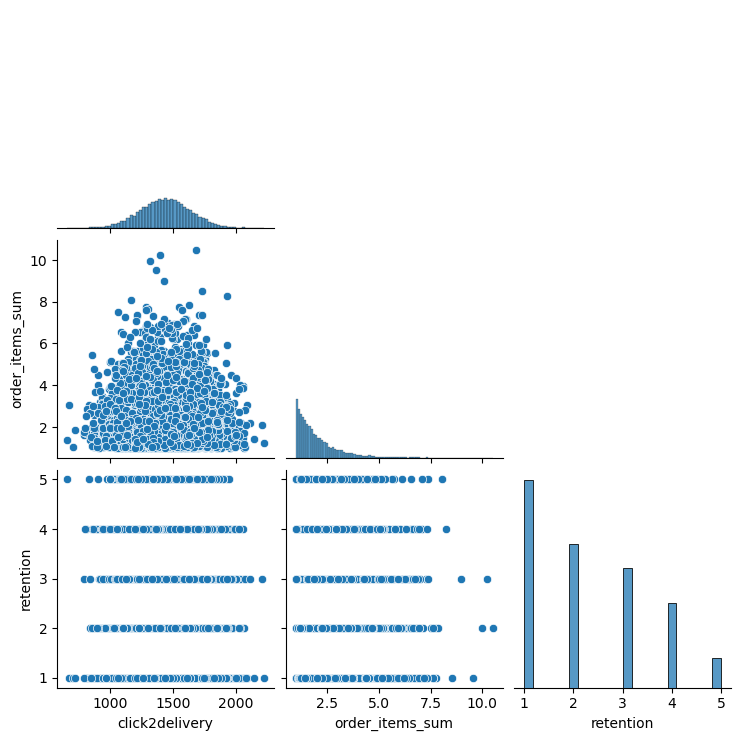

In [23]:
# Построим график на основе df по трем заданным признакам

sns.pairplot(df[['click2delivery', 'order_items_sum', 'retention']], corner=True);

In [ ]:
'''
Задание 5 выполнено
'''

In [ ]:
'''
Задание 6
Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки заказа от его номера. Обоснуй, почему ты так считаешь?
'''

In [24]:
df.head()

,user_id,order_num,click2delivery,order_items_sum,retention,mean_time,seq,transformed_user_id
0,2eh4c3h0kjbi732,2,1539.342831,1.387510,1,1442.98343,0.000,ehchkjbi5908458055824
1,80384c9ekb6bb79,2,1412.347140,1.108721,1,1442.98343,1.000,cekbbb646174306428403041
2,gf3245k6dj3ccje,2,1393.172609,1.053044,2,1442.98343,0.500,gfkdjccje105341140969
3,9g6g4k0kgj75b6h,2,1593.486946,2.399176,2,1442.98343,0.750,ggkkgjbh92944176251536
4,f7h5iif8fd744db,2,1488.392454,2.304981,4,1442.98343,0.625,fhiiffddb575692457536


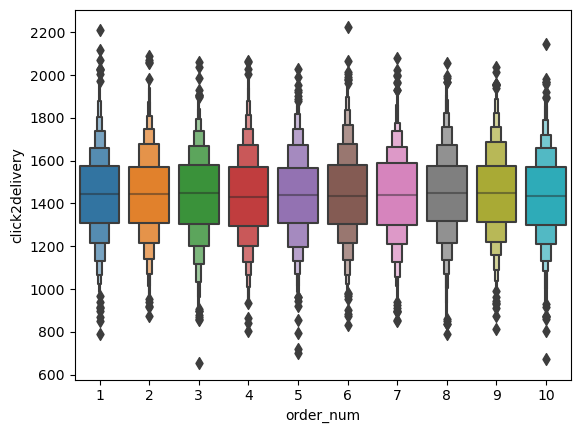

In [25]:
sns.boxenplot(data=df[['click2delivery', 'order_num']], x='order_num', y='click2delivery');

In [ ]:
'''
Построено 10 графиков. 
Они подчиняютмя нормальному распределению.
Их медианы близки.
Размах имеет некоторые отличия, но несущественные.
Наблюдается различное число выбросов, но на сгенерированном датасете избавляться от них нет смысла, 
а на натуральном ини могут быть как отброшены, так и использоваться в качестве дополнительной информации.
'''